# cp_opt demo

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base
import utils
import metrics

# Toy data set

## Load and generate data

In [2]:
data = loadmat('datasets/toydata.mat')
A = np.array(data["A"])
B = np.array(data["B"])
C = np.array([[1,1],[3,2]])

XX = base.ktensor(A,B,C)

## Find parafac decomposition with cp_opt

In [3]:
factors, result, _, log = cp.cp_opt(XX, rank=2, init='random', gtol=1e-5)
print(result.message)
print(f'F(x): { result.fun}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

Optimization terminated successfully.
F(x): 1.1607136908855172e-08
Number of iterations: 460
Number of function evaluations: 820


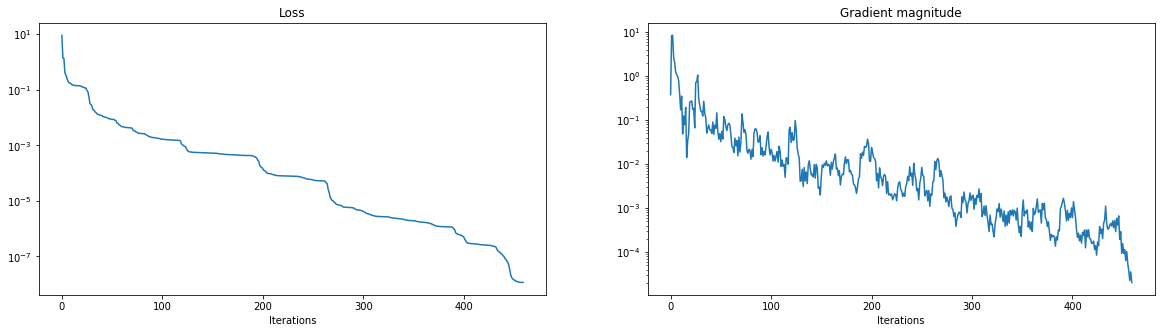

In [4]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(log.loss_values)
ax1.set_title('Loss')
ax1.set_xlabel('Iterations')

ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(log.gradient_values)
ax2.set_title('Gradient magnitude')
ax2.set_xlabel('Iterations')

ax2.set_yscale('log')

plt.show()

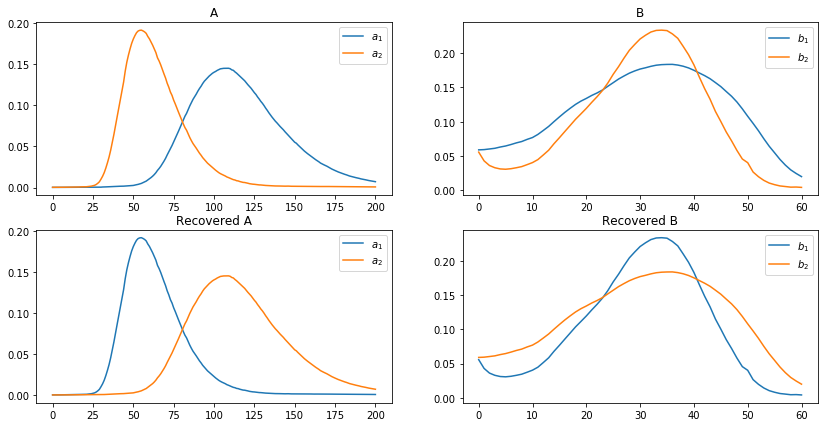

In [5]:
factors, sign, norms = utils.prepare_for_comparison(factors)
fig, axes = plt.subplots(2,2,figsize=(14,7))
axes[0,0].plot(A)
axes[0,1].plot(B)

axes[0,0].set_title("A")
axes[0,1].set_title("B")
axes[0,0].legend(["$a_1$", "$a_2$"])
axes[0,1].legend(["$b_1$", "$b_2$"])

axes[1,0].plot(factors[0])
axes[1,1].plot(factors[1]) 

axes[1,0].set_title("Recovered A")
axes[1,1].set_title("Recovered B")
axes[1,0].legend(["$a_1$", "$a_2$"])
axes[1,1].legend(["$b_1$", "$b_2$"])
plt.show()

# Aminoacid dataset

## Load data

In [6]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
X = X/np.linalg.norm(X)

## Find parafac decomposition with cp_opt

In [7]:
factors, result, initial_factors, log = cp.cp_opt(X, rank=3, method='L-BFGS-B', init='svd', gtol=1e-15)

In [8]:
print(result.message)
print(f'F(x): {result.fun}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
F(x): 0.000313715698312363
Number of iterations: 63
Number of function evaluations: 73


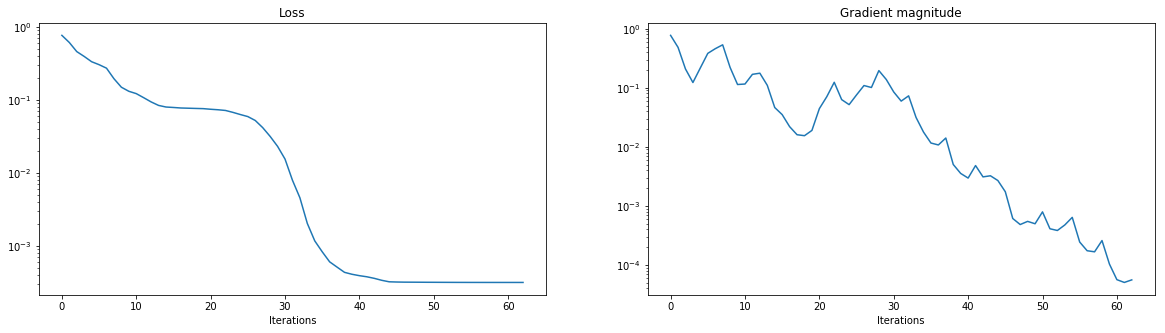

In [9]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(log.loss_values)
ax1.set_title('Loss')
ax1.set_xlabel('Iterations')

ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(log.gradient_values)
ax2.set_title('Gradient magnitude')
ax2.set_xlabel('Iterations')

ax2.set_yscale('log')

plt.show()

In [10]:
print(result)

      fun: 0.000313715698312363
 hess_inv: <801x801 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.93046892e-05,  2.64872966e-07, -7.61069828e-07, -1.14050980e-05,
        3.07545926e-06,  1.00394968e-06,  1.15148757e-05, -5.66653663e-06,
       -2.23088868e-06, -1.26352101e-05,  3.99415970e-06, -1.85332944e-06,
       -7.16225937e-06,  4.50949267e-06, -7.30044293e-07,  5.67900421e-08,
       -1.59536807e-08, -8.08526636e-08,  6.14047961e-08, -1.79482819e-08,
       -8.16642784e-08,  5.89102787e-08, -1.80246158e-08, -8.04017130e-08,
        5.24917582e-08, -1.54987887e-08, -7.66077894e-08,  6.17442174e-08,
       -1.59480389e-08, -8.42354433e-08,  6.41639000e-08, -1.76234681e-08,
       -7.74928684e-08,  7.30909978e-08, -1.82325746e-08, -8.49596322e-08,
        7.06883446e-08, -1.26436342e-08, -8.32525837e-08,  8.03733105e-08,
       -1.52734441e-08, -8.63261059e-08,  1.04042819e-07, -2.20630070e-08,
       -1.03119109e-07,  1.04542052e-07, -1.67196056e-08, -1.01172832e-0

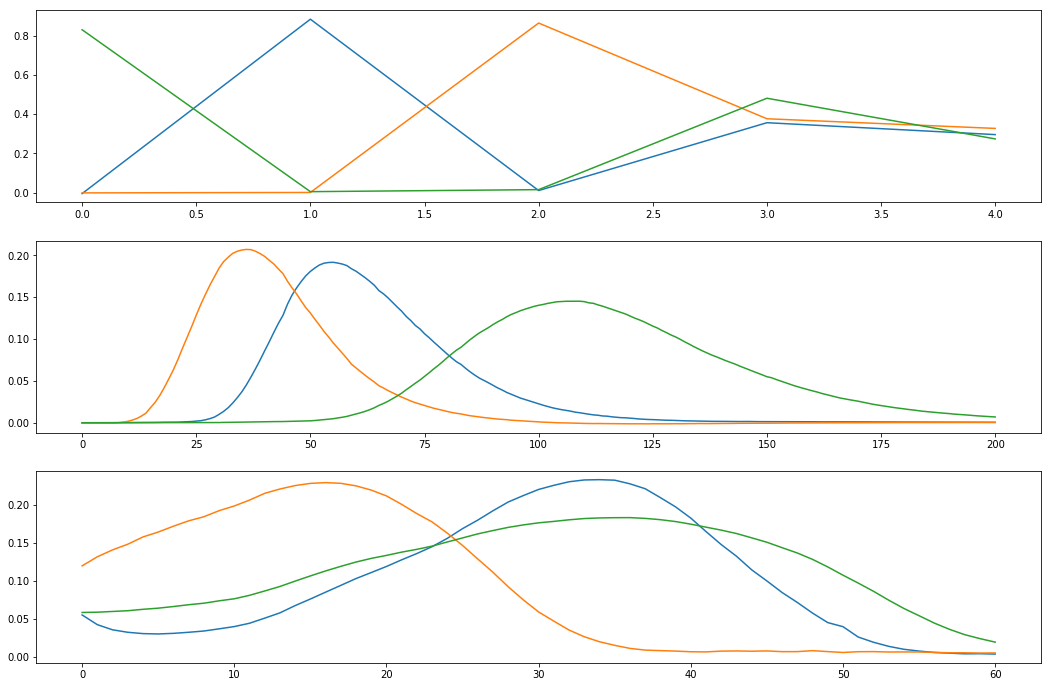

In [11]:
factors, sign, norms = utils.prepare_for_comparison(factors)
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(factors[i])
plt.show()

## Let's plot the initialization

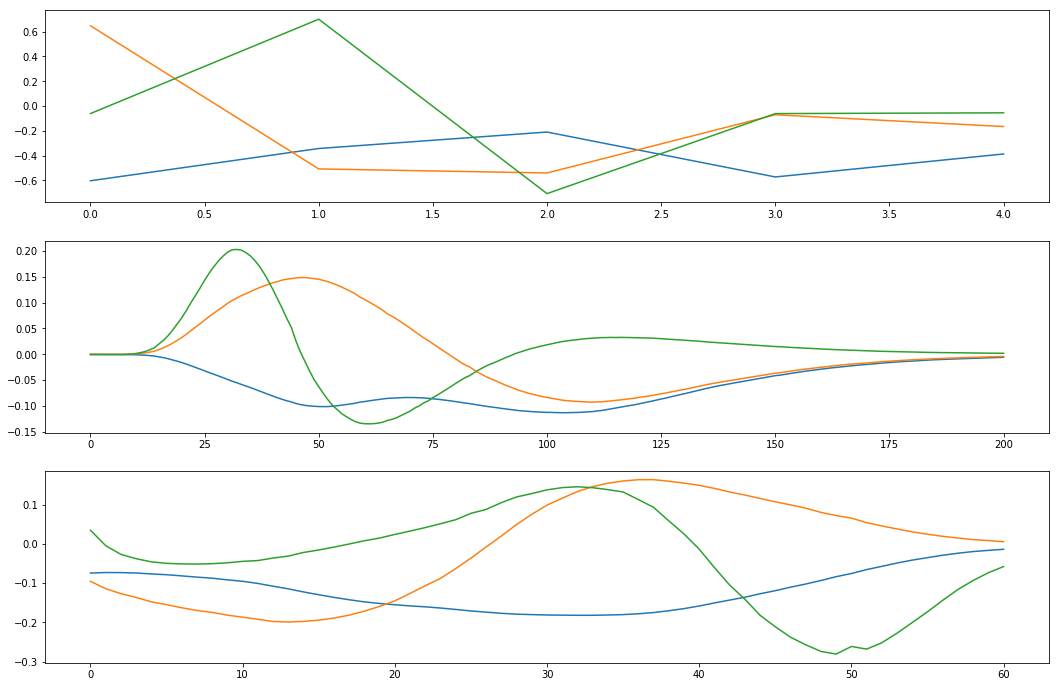

In [12]:
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(initial_factors[i])
plt.show()

## What happens when we look for wrong amount of  factors?

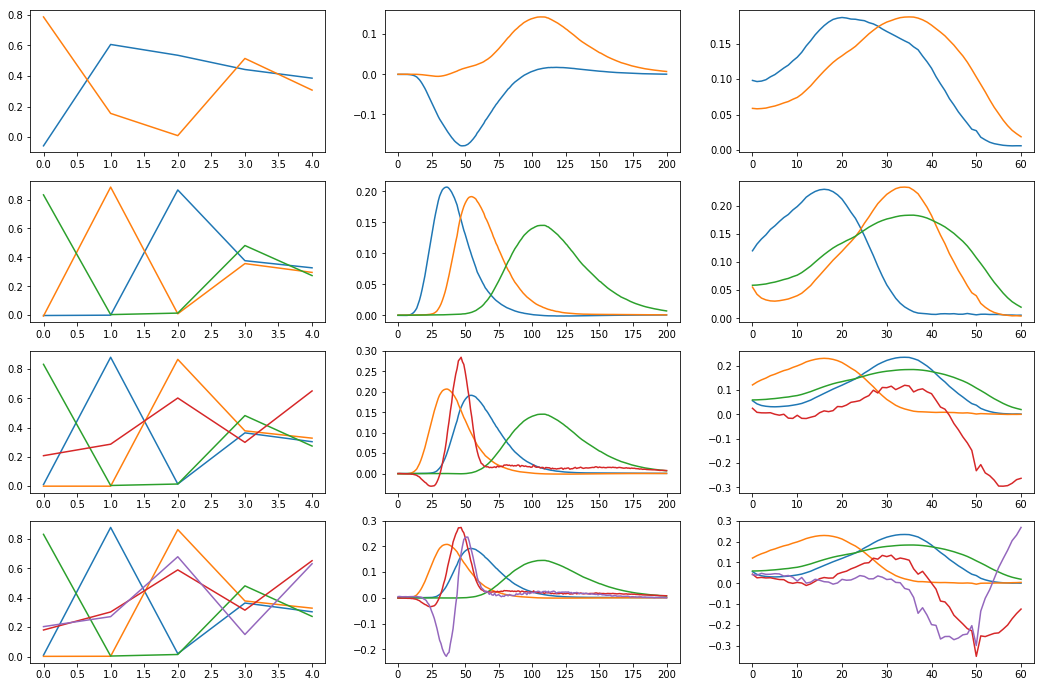

In [13]:
rank_list = [2,3,4,5]

fig, axes = plt.subplots(len(rank_list), 3, figsize=(18,12))
correct_rank_factors = factors
for i, rank in enumerate(rank_list):
    factors_unnorm, result,_,_ = cp.cp_opt(X, rank=rank, init='svd', gtol=1e-15)
    factors, sign, norms = utils.prepare_for_comparison(factors_unnorm)
    for j in range(3):
        axes[i][j].plot(factors[j])
        
plt.show()

## We can look at the weights of each component in the four component model

In [14]:
weights = np.prod(norms,axis=0).squeeze()

for i,w in enumerate(weights):
    print(f'Component {i:d} has weight {w:.2f}')

Component 0 has weight 0.49
Component 1 has weight 0.44
Component 2 has weight 0.70
Component 3 has weight 0.02
Component 4 has weight 0.01


In [15]:
score, best_permutation = metrics.factor_match_score(correct_rank_factors, factors, weight_penalty=False, fms_reduction='mean')


print(f'Factor match score between correct number of factors and overfactored: {score}')
print(f'Best match permutation: {best_permutation}')

Factor match score between correct number of factors and overfactored: 0.9997389586019563
Best match permutation: (0, 1, 2)
